# Machine Learning Project Checklist

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Frame the Problem and Look at the Big Picture

1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

## Get the Data
Note: automate as much as possible so you can easily get fresh data.

1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
7. For supervised learning tasks, identify the target attribute(s).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

In [3]:
import pandas as pd

players = pd.read_csv('DataFrame.csv')

In [9]:
players[["team","time"]].head()

team  time
0  amateurs   0.0
1  amateurs   1.0
2  amateurs   2.0
3  amateurs   3.0
4  amateurs   4.0

In [10]:
players[["team","time"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149753 entries, 0 to 149752
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   team    149753 non-null  object 
 1   time    149753 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [11]:
players["team"].value_counts()

amateurs    81738
pros        68015
Name: team, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(players, test_size=.2, random_state=43)

In [14]:
train.shape

(119802, 112)

In [15]:
test.shape

(29951, 112)

## Explore the Data
Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
   1. Name
   2. Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
   3. % of missing values
   4. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
   5. Possibly useful for the task?
   6. Type of distribution (Gaussian, uniform, logarithmic, etc.)   
4. Visualize the data.
5. Study the correlations between attributes.
6. Study how you would solve the problem manually.
7. Identify the promising transformations you may want to apply.
8. Identify extra data that would be useful (go back to “Get the Data”).
9. Document what you have learned.

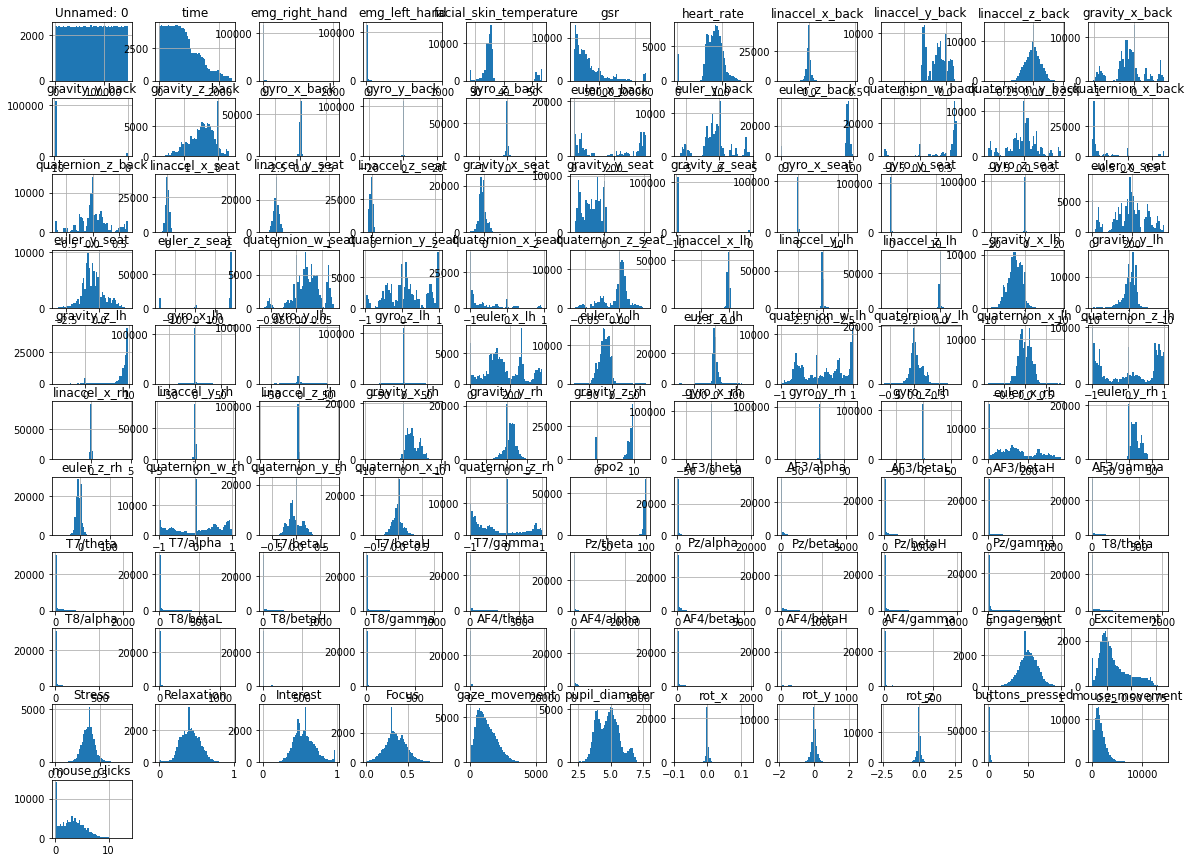

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
_ = train.hist(bins=50, figsize=(20,15))

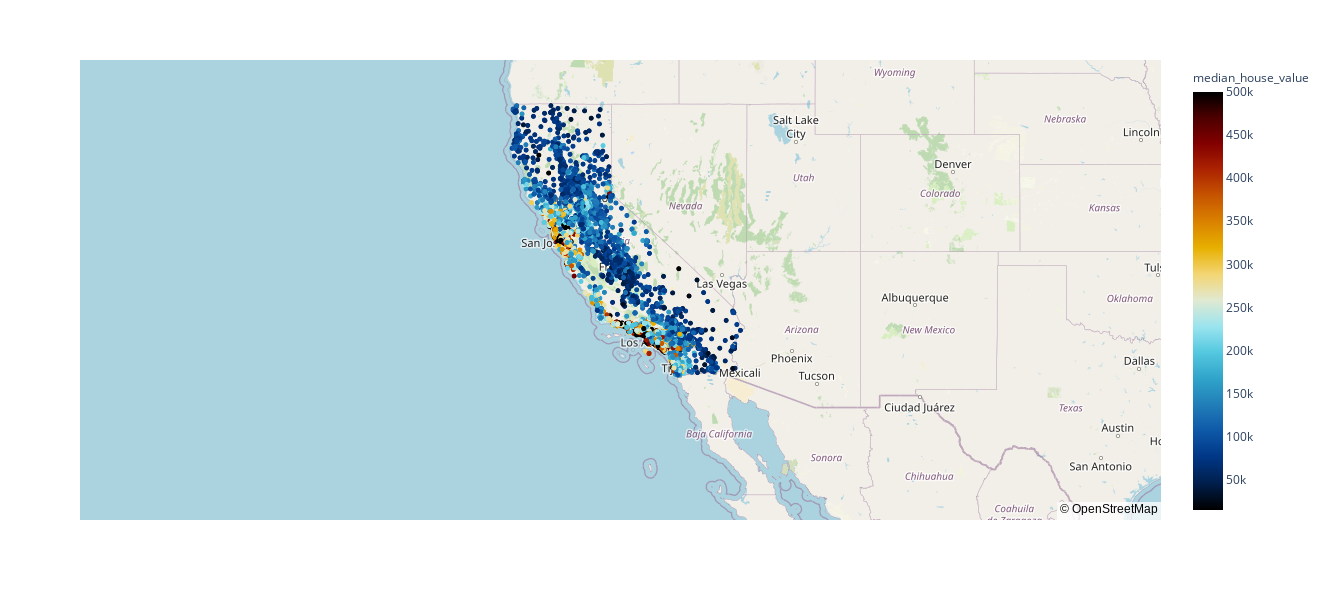

In [7]:
import plotly.express as px

fig = px.scatter_mapbox(train, lat="latitude", lon="longitude",     color="median_house_value",# size="car_hours",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [17]:
train.describe()

Unnamed: 0           time  emg_right_hand  emg_left_hand  \
count  119802.000000  119802.000000   119720.000000  119720.000000   
mean    74969.532429     763.643078       12.372777      10.017511   
std     43224.087473     531.459316       36.003994      19.894448   
min         0.000000       0.000000        2.713172       1.400666   
25%     37576.250000     339.000000        6.827079       5.391738   
50%     75015.500000     678.000000        8.290291       7.033986   
75%    112423.750000    1084.000000       10.798725       9.519025   
max    149752.000000    2400.000000     2060.569355     955.889038   

       facial_skin_temperature            gsr     heart_rate  linaccel_x_back  \
count             77589.000000  119720.000000  102480.000000    115106.000000   
mean                 36.574918   34694.456520      82.529159        -0.003219   
std                   6.014806   20471.067180      22.411164         0.020475   
min                  28.148613   14628.571429       0.000000        -0.304273   
25%                  34.130000   20361.885765      71.548387        -0.013062   
50%                  35.047345   28599.802080      84.483871        -0.002110   
75%                  35.765465   40611.269082      95.419355         0.006852   
max                  53.670000  114863.703557     163.000000         0.477350   

       linaccel_y_back  linaccel_z_back  ...      Interest         Focus  \
count    115106.000000    115106.000000  ...  37697.000000  37697.000000   
mean         -0.105282        -0.003840  ...      0.566073      0.355988   
std           0.116117         0.059320  ...      0.143390      0.128728   
min          -0.727175        -0.383947  ...      0.000000      0.000000   
25%          -0.241873        -0.042631  ...      0.469347      0.277802   
50%          -0.090562         0.000000  ...      0.556350      0.344859   
75%          -0.007989         0.035240  ...      0.648894      0.438760   
max           0.134248         0.231511  ...      0.979942      0.875444   

       gaze_movement  pupil_diameter         rot_x         rot_y  \
count   94757.000000    94757.000000  37946.000000  37946.000000   
mean     1190.693055        4.816112     -0.000067     -0.012069   
std       764.993267        0.849809      0.004015      0.154543   
min         0.000000        2.172667     -0.089896     -1.893375   
25%       622.399207        4.104986     -0.001093     -0.082618   
50%      1074.341481        4.818308      0.000000      0.000000   
75%      1681.155187        5.366896      0.000712      0.058623   
max      5494.113329        7.712070      0.125962      2.225857   

              rot_z  buttons_pressed  mouse_movement   mouse_clicks  
count  37946.000000    103481.000000   103406.000000  103406.000000  
mean      -0.007024         0.845839     1639.267219       3.128438  
std        0.147711         1.367374     1258.045680       2.230182  
min       -2.364397         0.000000        0.000000       0.000000  
25%       -0.041690         0.000000      823.033485       1.250000  
50%        0.000000         0.312500     1408.592269       3.062500  
75%        0.042498         1.187500     2180.278821       4.625000  
max        2.612111        90.687500    14385.465695      13.625000  

[8 rows x 111 columns]

In [18]:
train.corr()

Unnamed: 0      time  emg_right_hand  emg_left_hand  \
Unnamed: 0                 1.000000  0.121345       -0.014383       0.004026   
time                       0.121345  1.000000       -0.004358       0.012133   
emg_right_hand            -0.014383 -0.004358        1.000000       0.070105   
emg_left_hand              0.004026  0.012133        0.070105       1.000000   
facial_skin_temperature   -0.006423  0.011553        0.032638       0.040065   
...                             ...       ...             ...            ...   
rot_y                      0.001286 -0.006589       -0.004436      -0.014572   
rot_z                      0.070886  0.008591       -0.017458      -0.034021   
buttons_pressed           -0.059790 -0.018040       -0.010823      -0.025993   
mouse_movement            -0.108836  0.046814       -0.054237      -0.024736   
mouse_clicks               0.026520 -0.086436       -0.091610      -0.019390   

                         facial_skin_temperature       gsr  heart_rate  \
Unnamed: 0                             -0.006423 -0.281300   -0.069600   
time                                    0.011553 -0.006760    0.048113   
emg_right_hand                          0.032638  0.009214   -0.005922   
emg_left_hand                           0.040065  0.237154   -0.066749   
facial_skin_temperature                 1.000000 -0.080282   -0.499222   
...                                          ...       ...         ...   
rot_y                                  -0.136037  0.084093    0.031269   
rot_z                                  -0.033372  0.077126    0.008916   
buttons_pressed                        -0.006041 -0.031870    0.063548   
mouse_movement                          0.095639  0.036548   -0.111601   
mouse_clicks                            0.010715  0.008200   -0.086883   

                         linaccel_x_back  linaccel_y_back  linaccel_z_back  \
Unnamed: 0                      0.044229        -0.030696         0.019852   
time                            0.035424         0.014863        -0.030694   
emg_right_hand                 -0.004593        -0.044276         0.003928   
emg_left_hand                  -0.000159        -0.058294        -0.030641   
facial_skin_temperature         0.022363        -0.483621        -0.079898   
...                                  ...              ...              ...   
rot_y                          -0.017606         0.072292         0.025191   
rot_z                          -0.004875         0.095198         0.007230   
buttons_pressed                -0.002550         0.077162        -0.029642   
mouse_movement                  0.053066        -0.214816        -0.089013   
mouse_clicks                    0.018030         0.014192        -0.005940   

                         ...  Interest     Focus  gaze_movement  \
Unnamed: 0               ...  0.058443 -0.086876      -0.127012   
time                     ... -0.007622 -0.136561       0.042983   
emg_right_hand           ...  0.052638 -0.011478      -0.035543   
emg_left_hand            ...  0.079921  0.023956       0.027386   
facial_skin_temperature  ...  0.246696  0.097655      -0.211952   
...                      ...       ...       ...            ...   
rot_y                    ... -0.062715  0.010528       0.073983   
rot_z                    ...  0.067199 -0.015289      -0.010294   
buttons_pressed          ... -0.052970  0.034882      -0.112107   
mouse_movement           ... -0.048390 -0.047227      -0.003206   
mouse_clicks             ... -0.120354  0.055090      -0.085545   

                         pupil_diameter     rot_x     rot_y     rot_z  \
Unnamed: 0                     0.043292 -0.099762  0.001286  0.070886   
time                           0.105933  0.051845 -0.006589  0.008591   
emg_right_hand                -0.037505  0.039554 -0.004436 -0.017458   
emg_left_hand                 -0.061789  0.084891 -0.014572 -0.034021   
facial_skin_temperature       -0.449596 -0.035297 -0.136037 -0.03337

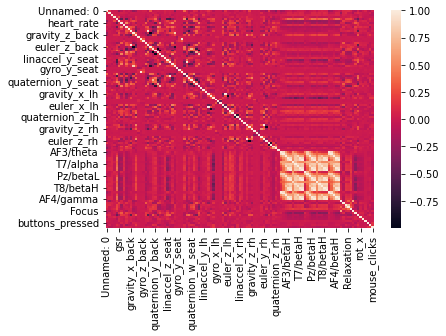

In [19]:
import seaborn as sns

_ = sns.heatmap(train.corr())

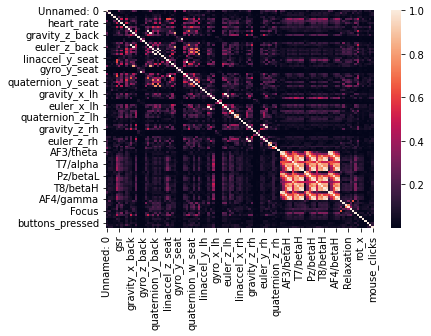

In [20]:
_ = sns.heatmap(train.corr().abs())

In [22]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(train, figsize=(20, 20))

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001E2C8571C10> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E2C816B160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
attributes = ["amateurs", "pros"]
_ = sns.pairplot(train[attributes])

In [ ]:
train.isna().sum()

In [ ]:
train.isna().sum()/train.count()*100

## Prepare the Data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for five reasons:
  * So you can easily prepare the data the next time you get a fresh dataset
  * So you can apply these transformations in future projects
  * To clean and prepare the test set
  * To clean and prepare new data instances once your solution is live
  * To make it easy to treat your preparation choices as hyperparameters

1. Data cleaning:
   1. Fix or remove outliers (optional).
   2. Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).
3. Feature selection (optional): Drop the attributes that provide no useful information for the task.
4. Feature engineering, where appropriate:
  1. Discretize continuous features.
  2. Decompose features (e.g., categorical, date/time, etc.).
  3. Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
  4. Aggregate features into promising new features.
5. Feature scaling: standardize or normalize features.

### Separate X from y

In [171]:
train_X = train.drop(columns=['median_house_value'])
train_y = train['median_house_value']

In [172]:
train_X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
72       -122.29     37.81                49.0        844.0           204.0   
2602     -123.52     41.01                17.0       1564.0           345.0   
19784    -122.89     40.76                14.0        712.0           131.0   
3405     -118.36     34.26                34.0       3677.0           573.0   
12492    -121.48     38.57                38.0       2809.0           805.0   

       population  households  median_income ocean_proximity  
72          560.0       152.0         1.7500        NEAR BAY  
2602        517.0       222.0         2.1542          INLAND  
19784       270.0        90.0         2.3958          INLAND  
3405       1598.0       568.0         6.8380       <1H OCEAN  
12492      1243.0       785.0         1.8512          INLAND

In [173]:
train_y.head()

72        75000.0
2602      83800.0
19784    102100.0
3405     378000.0
12492    114100.0
Name: median_house_value, dtype: float64

### Check for missing values 

In [174]:
train_X[train_X.isna().any(axis=1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16330    -121.33     38.02                31.0       1466.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
19391    -120.85     37.78                25.0        421.0             NaN   
11449    -117.98     33.68                24.0       4177.0             NaN   
7668     -118.08     33.92                38.0       1335.0             NaN   
...          ...       ...                 ...          ...             ...   
15060    -116.93     32.79                19.0       3354.0             NaN   
7228     -118.16     34.01                40.0       1552.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
18177    -122.00     37.36                17.0       2070.0             NaN   
20267    -119.19     34.20                18.0       3620.0             NaN   

       population  households  median_income ocean_proximity  
16330       608.0       254.0         3.1827          INLAND  
341         732.0       259.0         1.6196        NEAR BAY  
19391       303.0       106.0         2.2679          INLAND  
11449      1704.0       606.0         6.2473       <1H OCEAN  
7668       1011.0       269.0         3.6908       <1H OCEAN  
...           ...         ...            ...             ...  
15060      1948.0       682.0         3.0192       <1H OCEAN  
7228       1919.0       427.0         2.2596       <1H OCEAN  
10915      1970.0       499.0         3.4193       <1H OCEAN  
18177       797.0       275.0         8.6155       <1H OCEAN  
20267      3171.0       779.0         3.3409      NEAR OCEAN  

[161 rows x 9 columns]

### Removing rows

In [175]:
tmp = train_X.dropna()

tmp.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [176]:
train_X.count() - tmp.count()

longitude             161
latitude              161
housing_median_age    161
total_rooms           161
total_bedrooms          0
population            161
households            161
median_income         161
ocean_proximity       161
dtype: int64

### Removing columns

In [177]:
tmp = train_X.dropna(axis=1)

tmp.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [178]:
train_X.count() - tmp.count()

households            0.0
housing_median_age    0.0
latitude              0.0
longitude             0.0
median_income         0.0
ocean_proximity       0.0
population            0.0
total_bedrooms        NaN
total_rooms           0.0
dtype: float64

### Filling missing values

In [182]:
train_num = train_X.drop('ocean_proximity', axis=1)

train_num.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        161
population              0
households              0
median_income           0
dtype: int64

In [183]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(train_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [184]:
tmp = imputer.transform(train_num)
tmp = pd.DataFrame(tmp, columns=train_num.columns, index=train_num.index)

tmp.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [185]:
train_X.count() - tmp.count()

households              0.0
housing_median_age      0.0
latitude                0.0
longitude               0.0
median_income           0.0
ocean_proximity         NaN
population              0.0
total_bedrooms       -161.0
total_rooms             0.0
dtype: float64

### One-hot encoding

In [187]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder.fit(train_X[['ocean_proximity']])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [188]:
cat_encoder.transform(train[['ocean_proximity']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### Adding new attributes

In [189]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):    
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]        
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder()
attr_adder.transform(train_X.values)

array([[-122.29, 37.81, 49.0, ..., 'NEAR BAY', 5.552631578947368,
        3.6842105263157894],
       [-123.52, 41.01, 17.0, ..., 'INLAND', 7.045045045045045,
        2.328828828828829],
       [-122.89, 40.76, 14.0, ..., 'INLAND', 7.911111111111111, 3.0],
       ...,
       [-121.79, 37.03, 18.0, ..., '<1H OCEAN', 5.268156424581005,
        3.0391061452513966],
       [-122.23, 39.86, 21.0, ..., 'INLAND', 5.372670807453416,
        3.049689440993789],
       [-117.08, 32.73, 36.0, ..., 'NEAR OCEAN', 4.969957081545064,
        2.6566523605150216]], dtype=object)

### Full pipeline

In [193]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = train_num.columns
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

full_pipeline.fit(train)
train_prepared = full_pipeline.transform(train)
train_prepared.shape

(16512, 15)

In [194]:
columns = list(train_num.columns) + ['rooms_per_household', 'population_per_household'] + list(full_pipeline.transformers_[1][1].categories_[0])

train_prepared_df = pd.DataFrame(train_prepared, columns=columns)
train_prepared_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.352219  1.015389            1.616949    -0.828008       -0.803175   
1  -1.966357  2.514412           -0.923218    -0.495466       -0.463635   
2  -1.651798  2.397301           -1.161359    -0.888974       -0.978965   
3   0.610030 -0.647589            0.426246     0.480453        0.085408   
4  -0.947786  1.371407            0.743766     0.079555        0.644083   

   population  households  median_income  rooms_per_household  \
0   -0.792140   -0.920336      -1.119938             0.048442   
1   -0.831455   -0.735293      -0.905749             0.629349   
2   -1.057290   -1.084232      -0.777723             0.966456   
3    0.156915    0.179351       1.576241             0.406916   
4   -0.167665    0.752986      -1.066312            -0.720029   

   population_per_household  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0                  0.050810        0.0     0.0     0.0       1.0         0.0  
1                 -0.066269        0.0     1.0     0.0       0.0         0.0  
2                 -0.008293        0.0     1.0     0.0       0.0         0.0  
3                 -0.024413        1.0     0.0     0.0       0.0         0.0  
4                 -0.130656        0.0     1.0     0.0       0.0         0.0

In [195]:
train_prepared_df.describe().T

count          mean       std       min       25%  \
longitude                 16512.0  1.775066e-16  1.000030 -2.380776 -1.112555   
latitude                  16512.0 -3.236214e-15  1.000030 -1.453314 -0.797491   
housing_median_age        16512.0  1.037069e-16  1.000030 -2.193301 -0.843838   
total_rooms               16512.0  7.509067e-17  1.000030 -1.216898 -0.548580   
total_bedrooms            16512.0 -1.138194e-16  1.000030 -1.289608 -0.579224   
population                16512.0 -1.028462e-16  1.000030 -1.299582 -0.584591   
households                16512.0  7.681194e-17  1.000030 -1.316858 -0.581971   
median_income             16512.0 -1.581422e-16  1.000030 -1.782378 -0.690553   
rooms_per_household       16512.0  2.457122e-16  1.000030 -1.783506 -0.385198   
population_per_household  16512.0  1.110761e-17  1.000030 -0.207632 -0.057444   
<1H OCEAN                 16512.0  4.423450e-01  0.496680  0.000000  0.000000   
INLAND                    16512.0  3.179506e-01  0.465694  0.000000  0.000000   
ISLAND                    16512.0  2.422481e-04  0.015563  0.000000  0.000000   
NEAR BAY                  16512.0  1.122214e-01  0.315648  0.000000  0.000000   
NEAR OCEAN                16512.0  1.272408e-01  0.333253  0.000000  0.000000   

                               50%       75%         max  
longitude                 0.535135  0.784785    2.632194  
latitude                 -0.647589  0.973229    2.954750  
housing_median_age        0.029345  0.664386    1.855089  
total_rooms              -0.235436  0.240746   16.942678  
total_bedrooms           -0.246908  0.263606   13.659777  
population               -0.238067  0.276690   13.603689  
households               -0.238319  0.282447   12.841612  
median_income            -0.174156  0.463749    5.901415  
rooms_per_household      -0.079276  0.240802   53.123803  
population_per_household -0.024112  0.016193  107.132267  
<1H OCEAN                 0.000000  1.000000    1.000000  
INLAND                    0.000000  1.000000    1.000000  
ISLAND                    0.000000  0.000000    1.000000  
NEAR BAY                  0.000000  0.000000    1.000000  
NEAR OCEAN                0.000000  0.000000    1.000000

## Short-List Promising Models

Notes:
* If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
* Once again, try to automate these steps as much as possible.

1. Train many quick and dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
3. For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
4. Analyze the most significant variables for each algorithm.
5. Analyze the types of errors the models make.
6. What data would a human have used to avoid these errors?
7. Have a quick round of feature selection and engineering.
8. Have one or two more quick iterations of the five previous steps.
9. Short-list the top three to five most promising models, preferring models that make different types of errors.

### Linear regression

In [199]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [202]:
some_data = train_X.iloc[:5]
some_labels = train_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [163630.74101007  76691.88419852  61785.90286661 338907.16119856
 137476.48422632]
Labels: [75000.0, 83800.0, 102100.0, 378000.0, 114100.0]


In [208]:
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_y, pred)
lin_mse, np.sqrt(lin_mse)

(4677444174.087881, 68391.84289144343)

### Other model (for comparison purposes)

In [204]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_prepared, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [209]:
pred = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_y, pred)
tree_mse, np.sqrt(tree_mse)

(0.0, 0.0)

### Comparison with cross-validation

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

lin_reg_scores = cross_val_score(lin_reg, train_prepared, train_y, scoring=make_scorer(mean_squared_error), cv=10)

pd.Series(np.sqrt(lin_reg_scores)).describe()

count       10.000000
mean     68602.680790
std       1441.556284
min      66287.929179
25%      67557.078956
50%      68506.018797
75%      69678.594010
max      70860.769119
dtype: float64

In [223]:
tree_reg_scores = cross_val_score(tree_reg, train_prepared, train_y, scoring=make_scorer(mean_squared_error), cv=10)

pd.Series(np.sqrt(tree_reg_scores)).describe()

count       10.000000
mean     69267.225200
std       2162.351925
min      64688.404658
25%      68248.729137
50%      69447.289679
75%      70357.595588
max      72711.496371
dtype: float64

### Significance

In [229]:
list(zip(train_prepared_df.columns, lin_reg.coef_))

[('longitude', -56968.706636302435),
 ('latitude', -58551.0862604826),
 ('housing_median_age', 12914.264943967259),
 ('total_rooms', -11068.926200016405),
 ('total_bedrooms', 26048.24770697611),
 ('population', -50204.83898635163),
 ('households', 39966.23761762202),
 ('median_income', 71340.69764407263),
 ('rooms_per_household', 4984.726475592081),
 ('population_per_household', 1623.1951335889337),
 ('<1H OCEAN', -25175.68284348415),
 ('INLAND', -65139.25823080208),
 ('ISLAND', 142587.91138863994),
 ('NEAR BAY', -31268.625907238922),
 ('NEAR OCEAN', -21004.34440711478)]

### Error analysis

In [246]:
lin_reg.fit(train_prepared, train_y)
pred = lin_reg.predict(train_prepared)

train_with_predictions = pd.concat([train.reset_index(), pd.Series(pred)], axis=1).set_index('index').rename(columns={0: 'prediction'})
train_with_predictions.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
index                                                                         
72       -122.29     37.81                49.0        844.0           204.0   
2602     -123.52     41.01                17.0       1564.0           345.0   
19784    -122.89     40.76                14.0        712.0           131.0   
3405     -118.36     34.26                34.0       3677.0           573.0   
12492    -121.48     38.57                38.0       2809.0           805.0   

       population  households  median_income  median_house_value  \
index                                                              
72          560.0       152.0         1.7500             75000.0   
2602        517.0       222.0         2.1542             83800.0   
19784       270.0        90.0         2.3958            102100.0   
3405       1598.0       568.0         6.8380            378000.0   
12492      1243.0       785.0         1.8512            114100.0   

      ocean_proximity     prediction  
index                                 
72           NEAR BAY  163630.741010  
2602           INLAND   76691.884199  
19784          INLAND   61785.902867  
3405        <1H OCEAN  338907.161199  
12492          INLAND  137476.484226

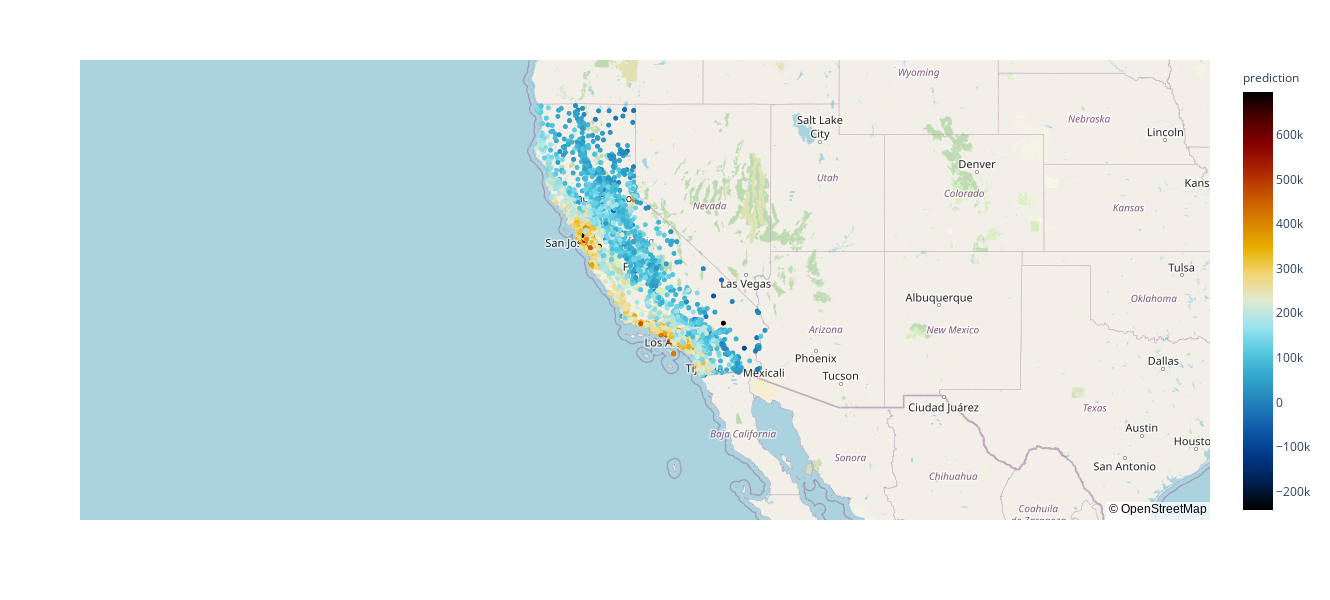

In [247]:
fig = px.scatter_mapbox(train_with_predictions, lat="latitude", lon="longitude", color="prediction",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

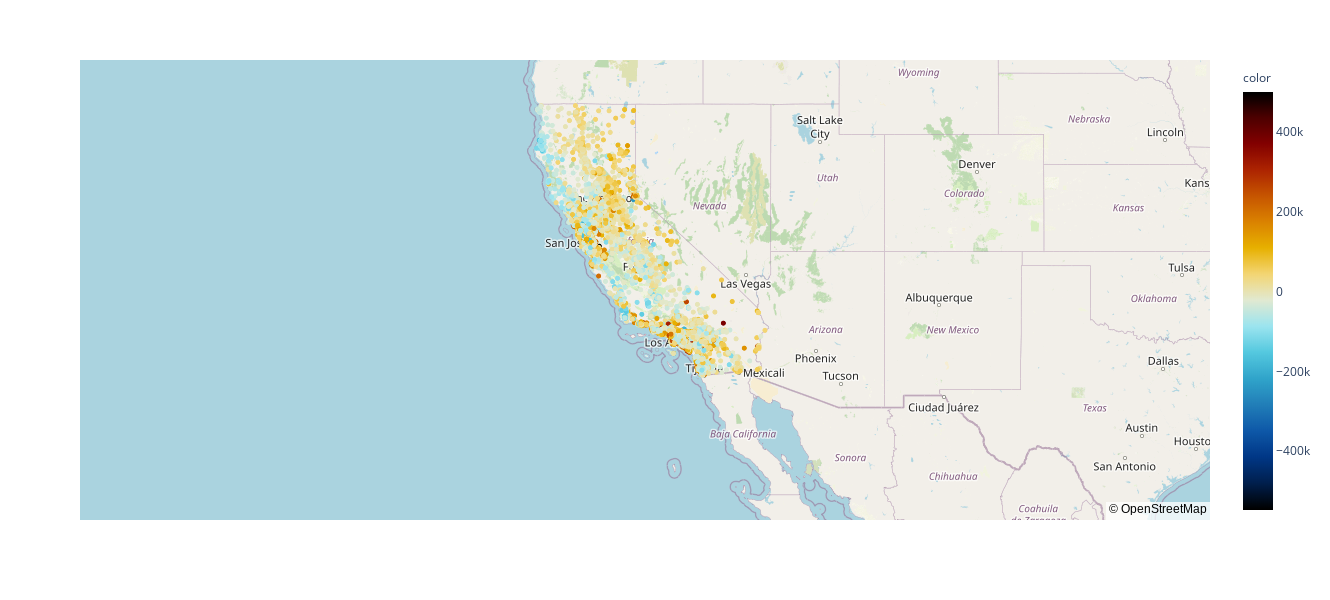

In [250]:
diff = train_with_predictions['median_house_value'] - train_with_predictions['prediction']
fig = px.scatter_mapbox(train_with_predictions, lat="latitude", lon="longitude", color=diff,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Fine-Tune the System

Notes:
* You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
* As always automate what you can.

1. Fine-tune the hyperparameters using cross-validation.
2. Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or with the median value? Or just drop the rows?).
3. Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach.
4. Try Ensemble methods. Combining your best models will often perform better than running them individually.
5. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

## Present Your Solution

1. Document what you have done.
2. Create a nice presentation.
3. Make sure you highlight the big picture first.
4. Explain why your solution achieves the business objective.
5. Don’t forget to present interesting points you noticed along the way.
6. Describe what worked and what did not.
7. List your assumptions and your system’s limitations.
8. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

## Launch!

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.
3. Beware of slow degradation too: models tend to “rot” as data evolves.
4. Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
5. Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
6. Retrain your models on a regular basis on fresh data (automate as much as possible).